<a href="https://colab.research.google.com/github/mylethidiem/zero-to-hero/blob/main/preAIO25/AIOCodeMathDA/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[AIO2025] LẬP TRÌNH - TOÁN - DATA ANALYSIS \
LÊ THỊ DIỄM MY

# Day 31: Optimization


Tối ưu hóa (Optimization) là quá trình tìm giá trị tối ưu của một hàm mục tiêu, thường là cực tiểu hoặc cực đại của hàm số. Bài toán tối ưu hóa tổng quát có dạng:
$$
\underset{x}{min}f(x) \text{ subject to constraints}
$$
Trong đó: \
- f(x) là hàm mục tiêu cần tối ưu
- x là biến quyết định
- Constraints (ràng buộc) giới hạn miền giá trị hợp lệ của x


Các phương pháp tối ưu hóa phổ biến
- Gradient Descent:
$$
x_{t+1} = x_t-\alpha \nabla f(x_t)
$$
Với \alpha là tốc độ học

- Newton's Method: Tăng tốc hội tụ bằng cách sử dụng đào hàm bậc 2:
$$
x_{t+1} = x_t - \frac{f'(x_t)}{f''(x_t)}
$$

- Linear Programming (Quy hoạch tuyến tính): Dùng để tối ưu bài toán với ràng buộc tuyến tính (library: scipy.optimize.linprog)

### Bài 1: Tối ưu hàm một biến bằng Gradient Descent

In [1]:
# f(x) = x^4 - 3x^3 + 2
# f'(x) = 4x^3 - 9x^2

import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return x**4 - 3*x**3 + 2

def f_prime(x):
  return 4*x**3 - 9*x**2

# Gradient Descent
def gradient_descent(f_prime, x_init, learning_rate=0.01, epochs=100):
  x = x_init
  history = [x]

  for _ in range(epochs):
    x = x - learning_rate * f_prime(x)
    history.append(x)

  return x, history

# Run gradient descent
x_init = 0.5
learning_rate = 0.01
epochs = 100
x_optimal, history = gradient_descent(f_prime, x_init, learning_rate, epochs)

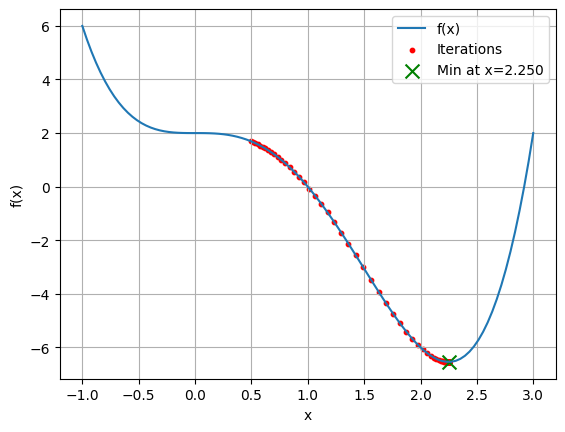

In [5]:
#Graph
x_vals = np.linspace(-1, 3, 100)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals, label="f(x)")
plt.scatter(history, [f(x) for x in history], color="red", s=10, label="Iterations")
plt.scatter(x_optimal, f(x_optimal), color="green", marker="x", s=100, label=f"Min at x={x_optimal:.3f}")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

### Bài 2: Hồi quy tuyến tính với Gradient Descent

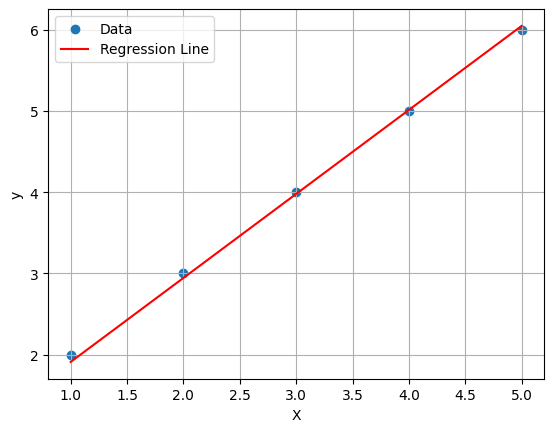

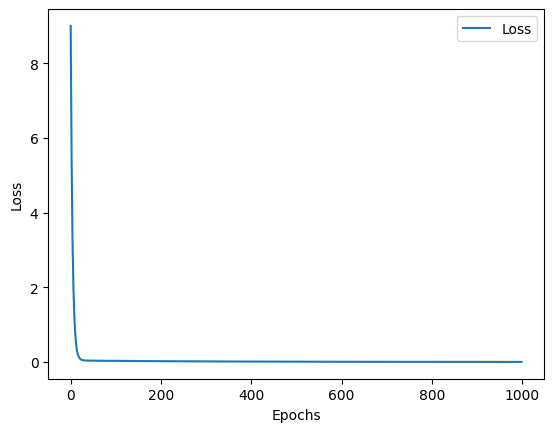

Hệ số tối ưu: w = 1.034, b = 0.876


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2, 3, 4, 5, 6])

# Hàm dự đoán
def forward(x, w, b):
    return w * x + b

# Tính gradient
def gradient(y, y_pred, x):
    dw = np.mean((y_pred - y) * x)  # Lấy trung bình
    db = np.mean(y_pred - y)
    return dw, db

# Hàm mất mát
def loss(y, y_pred):
    return np.mean((y_pred - y) ** 2) / 2  # Bình phương sai số

# Cập nhật tham số
def update(w, b, dw, db, learning_rate):
    w -= learning_rate * dw
    b -= learning_rate * db
    return w, b

# Khởi tạo tham số
w, b = 0.0, 0.0
learning_rate = 0.01
epochs = 1000
losses = []

# Vòng lặp huấn luyện
for _ in range(epochs):
    y_preds = forward(X, w, b)  # Dự đoán toàn bộ tập dữ liệu
    loss_value = loss(Y, y_preds)
    losses.append(loss_value)

    dw, db = gradient(Y, y_preds, X)  # Tính gradient trên toàn bộ dữ liệu
    w, b = update(w, b, dw, db, learning_rate)  # Cập nhật tham số

# Vẽ đường hồi quy
plt.scatter(X, Y, label="Data")
plt.plot(X, forward(X, w, b), color='red', label="Regression Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

# Vẽ biểu đồ mất mát
plt.plot(losses, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

print(f"Hệ số tối ưu: w = {w:.3f}, b = {b:.3f}")


### Bài 3: Newton's Method
$$
f(x) = x^3-6x^2 + 4x + 12 \\
f'(x) = 3x^2 - 12x + 4, \\
f''(x) = 6x - 12
$$

In [11]:
def f_prime(x):
  return 3 * (x**2) - 12 * x + 4

def f_double_prime(x):
  return 6 * x - 12

x = 5
for _ in range(10):
  x = x - f_prime(x) / f_double_prime(x)

print(f"Cực tiểu tại x = {x:.3f}")


Cực tiểu tại x = 3.633


# Day 32: Linear Regression

Dự đoán giá vàng bằng Hồi quy tuyến tính

# Day 33

# Day 34

# Day 35